In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
from scipy.stats import chi2
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
global my_dtype,molwt,catnum,catwt

# import csv file
df_all = pd.read_csv('Melt_cal_4.csv')

index = df_all.index
columns = df_all.columns
data = df_all.values
df_all.fillna(0, inplace=True)
df_all.set_index('Experiment', inplace=True)

#Check original dataframe
print (df_all.shape)
df_all

(316, 25)


,Reference,Apparatus,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,...,P2O5,H2O,Cr2O3,Total,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),alk,KB08
Experiment,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,1atm_furnace,0.001,0.00001,1161,gl-ol-cp-pl,51.90,2.38,13.60,11.30,...,0.00,0.0,0.06,99.54,7.720,4.93360,1.32360,4.110,3.61,3.4945
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1163,gl-ol-cp-pl,49.80,2.35,13.60,12.20,...,0.32,0.0,0.00,99.14,6.040,3.85420,0.43420,2.620,3.42,2.7700
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1152,gl-ol-cp-pl,50.00,2.47,13.70,11.70,...,0.36,0.0,0.00,99.10,6.200,3.95700,0.37700,2.620,3.58,3.1305
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1148,gl-ol-cp-pl,49.80,2.30,13.70,12.00,...,0.32,0.0,0.00,99.09,6.040,3.85420,0.48420,2.670,3.37,3.4805
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1145,gl-ol-cp-pl,49.80,3.32,12.90,12.90,...,0.43,0.0,0.00,98.92,6.040,3.85420,0.49420,2.680,3.36,4.4773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,Thy and Lofgren 1994,1atm_furnace,0.001,0,1098,gl-ol-cp-pl-ox,52.05,3.52,12.31,14.17,...,1.36,0.0,0.00,0.00,7.840,5.01070,-0.73930,2.090,5.75,2.9742
8759,Thy and Lofgren 1994,1atm_furnace,0.001,0,1090,gl-ol-cp-pl-ox,52.85,2.84,12.67,13.12,...,1.65,0.0,0.00,0.00,8.480,5.42190,-0.86810,2.190,6.29,11.5618
SAX2,Thy and Lofgren 1994,1atm_furnace,0.001,0,1081,gl-ol-cp-pl-ox,45.89,3.72,15.03,13.06,...,0.84,0.0,0.00,0.00,2.912,1.84446,-1.95554,-0.888,3.80,11.7114


In [2]:
"Basaltic compositions <4 wt% MgO "
#Filter out data with low MgO
df = df_all.drop(df_all[df_all.MgO<4.0].index)

#Check dataframe
print (df.shape)
df

(254, 25)


,Reference,Apparatus,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,...,P2O5,H2O,Cr2O3,Total,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),alk,KB08
Experiment,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,1atm_furnace,0.001,0.00001,1161,gl-ol-cp-pl,51.90,2.38,13.60,11.300000,...,0.00,0.0,0.06,99.54,7.720,4.93360,1.32360,4.110,3.61,3.4945
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1163,gl-ol-cp-pl,49.80,2.35,13.60,12.200000,...,0.32,0.0,0.00,99.14,6.040,3.85420,0.43420,2.620,3.42,2.7700
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1152,gl-ol-cp-pl,50.00,2.47,13.70,11.700000,...,0.36,0.0,0.00,99.10,6.200,3.95700,0.37700,2.620,3.58,3.1305
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1148,gl-ol-cp-pl,49.80,2.30,13.70,12.000000,...,0.32,0.0,0.00,99.09,6.040,3.85420,0.48420,2.670,3.37,3.4805
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1145,gl-ol-cp-pl,49.80,3.32,12.90,12.900000,...,0.43,0.0,0.00,98.92,6.040,3.85420,0.49420,2.680,3.36,4.4773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Thy 1991,Piston Cylinder,10.000,0,1180,gl-ol-cp-pl,45.49,4.01,14.97,14.860000,...,0.50,0.0,0.00,100.04,2.592,1.63886,-3.36114,-2.408,5.00,7.0899
DVDP2 basanite,"Gerke et al., 2004",1atm_furnace,0.001,0,"1,104",gl-ol-cp-pl-ox,42.64,5.39,15.92,9.822666,...,1.87,0.0,0.00,97.26,0.312,0.17396,-7.40604,-7.268,7.58,4.7136
SAX2,Thy and Lofgren 1994,1atm_furnace,0.001,0,1081,gl-ol-cp-pl-ox,45.89,3.72,15.03,13.060000,...,0.84,0.0,0.00,0.00,2.912,1.84446,-1.95554,-0.888,3.80,11.7114


### Cells 4 to 7 set up the nexessary functions for the OPAM pressure to be calculated and minimisations be estimated in Cell 8

In [3]:
# turn weight percent oxides into mole fractions
names=['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO', 'MnO', 'CaO', 'Na2O', 'K2O', 'P2O5','Cr2O3','H2O']
formats=['<f8','<f8','<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8']
my_dtype = dict(names=names, formats=formats)
molwt = np.array([(60.08,79.866,101.96,71.844,40.3044,70.9374,56.0774,61.9789,94.20,283.89,151.99,18.01528)],dtype=my_dtype)
catnum = np.array([(1.,1.,2.,1.,1.,1.,1.,2.,2.,2.,2.,2.)],dtype=my_dtype)
catwt = np.zeros_like(molwt) # mol weight of oxide with single cation in formula unit
for n in my_dtype['names']:
    catwt[n] = molwt[n]/catnum[n] # Beattie style single cation molar fracs

In [4]:
def wt2cat (majwt):
    "convert wt% oxide to atomic % of cation"
    # create empty dataframe of same shape
    catprop= df*0 
    for n in my_dtype['names']:
        #calc cation wt sum of each sample
        catprop[n] = majwt[n]/catwt[n]
        
    catprop['molsum']= catprop.sum(axis=1)
    Msum = catprop['molsum'].to_numpy()
    
    catfrac = df*0
    for n in my_dtype['names']:
        catfrac[n] = catprop[n]/Msum 
    return catfrac

In [5]:
def xpred (p,xna,xk,xti,xfe,xsi):
    "calculate XAl,XCa,XMg for Yang model"
     
    xalp = 0.236 + 0.00218*p + 0.109*xna + 0.593*xk -0.350*xti -0.299*xfe - 0.130*xsi
    xcap = 1.133 - 0.00339*p -0.569*xna -0.776*xk-0.672*xti-0.214*xfe-3.355*xsi + 2.830*(xsi*xsi)
    xmgp = -0.277 + 0.00114*p -0.543*xna -0.947*xk -0.117*xti-0.490*xfe+2.086*xsi -2.400*(xsi*xsi) # original from table   
 
    return(xalp,xcap,xmgp)

In [6]:
def cc (pkbar,xna,xk,xti,xfe,xsi,xalo,xcao,xmgo,xals,xcas,xmgs):
    "chi2 function to minimise"
    xalp,xcap,xmgp = xpred(pkbar,xna,xk,xti,xfe,xsi)    
    cc =((xalo-xalp)/xals)**2. + ((xcao-xcap)/xcas)**2. + ((xmgo-xmgp)/xmgs)**2.
 
    return(cc)

### Iterative calculation for OPAM barometer, following parameterisation of Yang et al., 1996

In [7]:
majwt = df.copy()
xobs = wt2cat(majwt)    
xalo,xcao,xmgo = xobs['Al2O3'],xobs['CaO'],xobs['MgO']

# 5% precision on major elements in glasses - 1 sig - estimate from NEAVE et al., 2015
xals,xcas,xmgs = 0.05*xalo,0.05*xcao,0.05*xmgo

xna,xk,xti,xfe,xsi = xobs['Na2O'],xobs['K2O'],xobs['TiO2'],xobs['FeO'],xobs['SiO2']
pkbar = 3.0


cctest = cc(pkbar,xna,xk,xti,xfe,xsi,xalo,xcao,xmgo,xals,xcas,xmgs)

ppmin = [] 
pprob = []

#Minimisation to iteratively estimate best fit of Pressure.
for q in range(len(xsi)):
    res = minimize_scalar(cc, method= 'brent', args = (xna[q],xk[q],xti[q],xfe[q],xsi[q],xalo[q],xcao[q],xmgo[q],xals[q],xcas[q],xmgs[q]))
    pmin = res.x
    cpmin = res.fun
    
    #Probability of pressure estimate fit.
    prob = 1- chi2.cdf(cpmin,2) # Probability distribution function - signifance value
    ppmin.append(pmin)
    pprob.append(prob)

#adding estimated Pressure minimum and probability of estimatation to dataframe     
df.loc[:,('Pressure_min')] = ppmin    
df.loc[:,('Probability')] = pprob 

#Check dataframe
df_Un = df
df_Un

C:\Users\r.j.m.baxter\.conda\envs\pygmt\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\r.j.m.baxter\.conda\envs\pygmt\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Reference,Apparatus,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,...,Cr2O3,Total,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),alk,KB08,Pressure_min,Probability
Experiment,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,1atm_furnace,0.001,0.00001,1161,gl-ol-cp-pl,51.90,2.38,13.60,11.300000,...,0.06,99.54,7.720,4.93360,1.32360,4.110,3.61,3.4945,-0.717450,0.820937
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1163,gl-ol-cp-pl,49.80,2.35,13.60,12.200000,...,0.00,99.14,6.040,3.85420,0.43420,2.620,3.42,2.7700,2.316884,0.896354
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1152,gl-ol-cp-pl,50.00,2.47,13.70,11.700000,...,0.00,99.10,6.200,3.95700,0.37700,2.620,3.58,3.1305,1.681299,0.966585
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1148,gl-ol-cp-pl,49.80,2.30,13.70,12.000000,...,0.00,99.09,6.040,3.85420,0.48420,2.670,3.37,3.4805,1.994374,0.985431
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1145,gl-ol-cp-pl,49.80,3.32,12.90,12.900000,...,0.00,98.92,6.040,3.85420,0.49420,2.680,3.36,4.4773,1.035496,0.986987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Thy 1991,Piston Cylinder,10.000,0,1180,gl-ol-cp-pl,45.49,4.01,14.97,14.860000,...,0.00,100.04,2.592,1.63886,-3.36114,-2.408,5.00,7.0899,6.748706,0.974859
DVDP2 basanite,"Gerke et al., 2004",1atm_furnace,0.001,0,"1,104",gl-ol-cp-pl-ox,42.64,5.39,15.92,9.822666,...,0.00,97.26,0.312,0.17396,-7.40604,-7.268,7.58,4.7136,5.089034,0.272646
SAX2,Thy and Lofgren 1994,1atm_furnace,0.001,0,1081,gl-ol-cp-pl-ox,45.89,3.72,15.03,13.060000,...,0.00,0.00,2.912,1.84446,-1.95554,-0.888,3.80,11.7114,4.635597,0.078370


In [8]:
#print (cctest)

# **Unfiltered data**

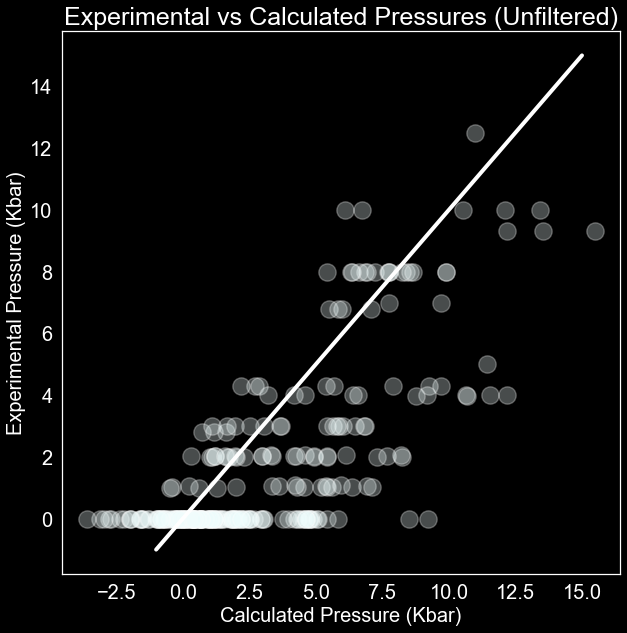

In [9]:
#plot results before probability filter
'Known experimental pressure versus Predicted pressure'
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("dark")
plt.style.use("dark_background")
ax = sns.scatterplot(x="Pressure_min", y="Pressure_kbar", data=df_Un, s=300, color = "azure", alpha = 0.3)
#ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.axes.set_title("Experimental vs Calculated Pressures (Unfiltered)",fontsize=25)
ax.set_xlabel("Calculated Pressure (Kbar)",fontsize=20)
ax.set_ylabel("Experimental Pressure (Kbar)",fontsize=20)
ax.tick_params(labelsize=20)

#creating 1:1 line
x = np.linspace(-1,15,100)
y = 1*x+0
plt.plot(x, y, '-w', linewidth=4.0)
plt.show()

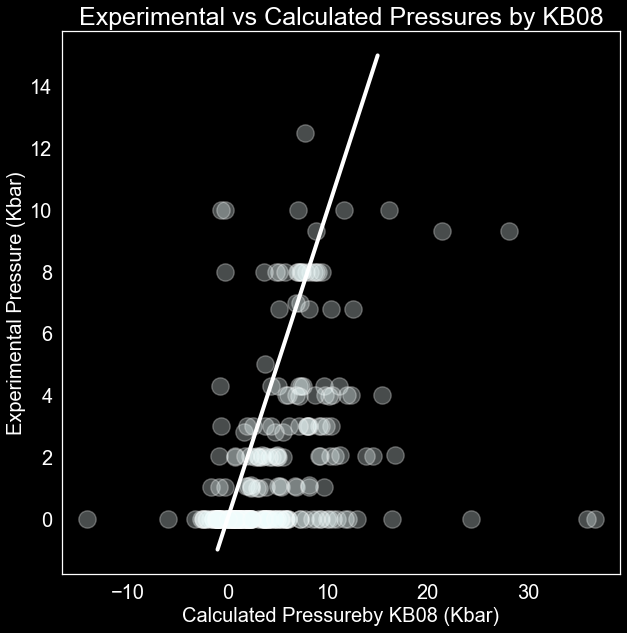

In [10]:
#plot results before probability filter
'Known experimental pressure versus Predicted pressure'
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("dark")
plt.style.use("dark_background")
ax = sns.scatterplot(x="KB08", y="Pressure_kbar", data=df_Un, s=300, color = "azure", alpha = 0.3)
#ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.axes.set_title("Experimental vs Calculated Pressures by KB08",fontsize=25)
ax.set_xlabel("Calculated Pressureby KB08 (Kbar)",fontsize=20)
ax.set_ylabel("Experimental Pressure (Kbar)",fontsize=20)
ax.tick_params(labelsize=20)

#creating 1:1 line
x = np.linspace(-1,15,100)
y = 1*x+0
plt.plot(x, y, '-w', linewidth=4.0)
plt.show()

In [40]:
#df_up['delta_P'] = df_up['Pressure_min']-df_up['Pressure_kbar']
"test mean absolute error of KB08?????????"
df_up['delta_P2'] = df_up['KB08']-df_up['Pressure_kbar']

#Finding Mean Absolute Error
df_up['Abs_deltaP']=abs(df_up['delta_P2'])
#print (df_up['Abs_deltaP'])
Sum_of_error = sum(df_up['Abs_deltaP'])
#print (Sum_of_error)
N = len(df_up.index)
#print (N)
MAE = Sum_of_error/N
print (MAE)


2.857636842105263


In [12]:
#Finding RMSE
import math

#Residuals squared
df_Un['Sqrd_Rsd']=df_Un['delta_P']**2
#print (df_Un['Sqrd_Rsd'])
#mean of residuals
Res = sum(df_Un['Sqrd_Rsd'])
#print (Res)
M = len(df_Un.index)
#print (M)
Mean_Res = Res/M
#print (Mean_Res)

#Squared root of mean residuals
RMSE = math.sqrt(Mean_Res)
print (RMSE)

2.7644942084932964


<ipython-input-12-3bb9183c7d79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Un['Sqrd_Rsd']=df_Un['delta_P']**2


In [61]:
fig = px.scatter(df_Un, x="delta_P", y="Probability",  template= "plotly_dark", labels={"delta_P": "ΔP",  "Pressure_kbar": "Experimental Pressure"}, marginal_x="histogram", marginal_y="histogram", color='alk',color_continuous_scale=px.colors.sequential.deep, title="ΔP vs Alkalinity")
fig.show()

In [36]:
df_Un['delta_P2'] = df_Un['KB08']-df_Un['Pressure_kbar']

<ipython-input-36-b7e276b2ab64>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
fig = px.scatter(df_Un, x="delta_P2", y="Probability",  template= "plotly_dark", labels={"delta_P": "ΔP",  "Pressure_kbar": "Experimental Pressure"}, marginal_x="histogram", marginal_y="histogram", color='alk',color_continuous_scale=px.colors.sequential.deep, title="ΔP vs Alkalinity, KB08")
fig.show()

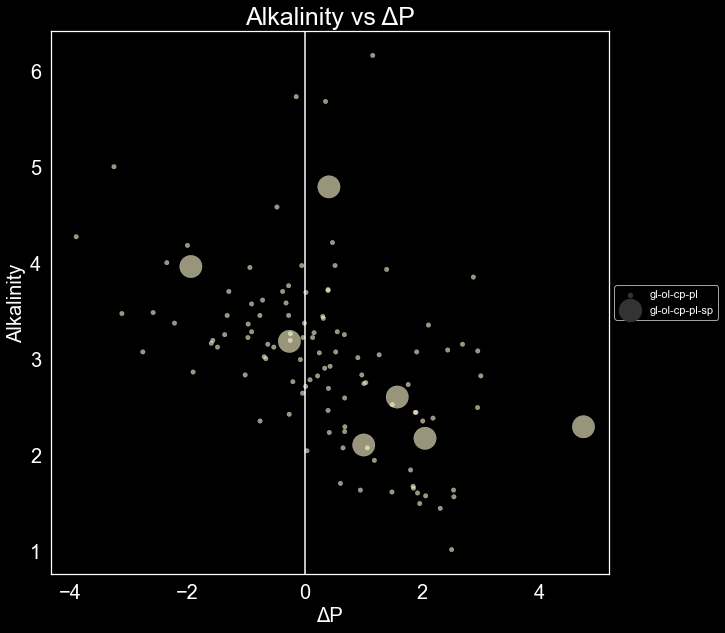

In [63]:
sns.set_style("dark")
plt.style.use("dark_background")
#sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="delta_P", y="alk", data=df_up, s=300, color = 'lemonchiffon', size = 'Phases', sizes = (500, 20), alpha = 0.6)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.axvline(0)


ax.axes.set_title("Alkalinity vs ΔP",fontsize=25)
ax.set_xlabel("ΔP",fontsize=20)
ax.set_ylabel("Alkalinity",fontsize=20)
ax.tick_params(labelsize=20)

In [15]:
import plotly.express as px
#selecting data frames for pressure ranges
atm = df_Un[df_Un['Pressure_kbar']== 0.001]
fig = px.violin(atm, x="delta_P", title= "Unfiltered experimental 1 atm vs delta P")
fig.show()

# **Filtered data ( P > 0.80)**

In [58]:
#filter out data with low probability (>0.80)
df_Thn = df_Un['Probability']>0.70
df_prob = df_Un[df_Thn]
df_up = df_prob.copy()

columns=['Abs_deltaP','Sqrd_Rsd']
df_up.drop(columns,inplace=True,axis=1)

#check dataframe
print (df_up.shape)

(113, 29)


In [43]:
df_up

,Reference,Apparatus,Pressure_kbar,Pressure_error,Temperature_degC,Phases,SiO2,TiO2,Al2O3,FeO,...,Alk Line,Sub line,Alkalinity (S),Alkalinity (A),alk,KB08,Pressure_min,Probability,delta_P,delta_P2
Experiment,,,,,,,,,,,,,,,,,,,,,
KN-54-2-2-1,Grove1992,1atm_furnace,0.001,0.00001,1161,gl-ol-cp-pl,51.90,2.38,13.60,11.30,...,7.720,4.93360,1.32360,4.110,3.61,3.4945,-0.717450,0.820937,-0.718450,3.4935
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1163,gl-ol-cp-pl,49.80,2.35,13.60,12.20,...,6.040,3.85420,0.43420,2.620,3.42,2.7700,2.316884,0.896354,0.316884,0.7700
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1152,gl-ol-cp-pl,50.00,2.47,13.70,11.70,...,6.200,3.95700,0.37700,2.620,3.58,3.1305,1.681299,0.966585,-0.318701,1.1305
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1148,gl-ol-cp-pl,49.80,2.30,13.70,12.00,...,6.040,3.85420,0.48420,2.670,3.37,3.4805,1.994374,0.985431,-0.005626,1.4805
ALV-1690-20,Grove1992,zhm_ar,2.000,0.02,1145,gl-ol-cp-pl,49.80,3.32,12.90,12.90,...,6.040,3.85420,0.49420,2.680,3.36,4.4773,1.035496,0.986987,-0.964504,2.4773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,Thy 1991,Piston Cylinder,0.001,0,1131,gl-ol-cp-pl,47.62,4.30,12.40,14.07,...,4.296,2.73368,-1.44632,0.116,4.18,4.9644,-1.997426,0.942521,-1.998426,4.9634
18,Thy 1991,Piston Cylinder,0.001,0,1124,gl-ol-cp-pl-sp,47.17,3.42,12.77,13.59,...,3.936,2.50238,-1.45762,-0.024,3.96,5.2531,-1.939554,0.986441,-1.940554,5.2521
26,Thy 1991,Piston Cylinder,0.001,0,1118,gl-ol-cp-pl-sp,47.54,4.57,13.20,13.59,...,4.232,2.69256,-2.09744,-0.558,4.79,2.3632,0.412951,0.906633,0.411951,2.3622


In [44]:
import plotly.express as px
atmb = df_up[df_up['Pressure_kbar']== 0.001]
fig = px.violin(atmb, x="delta_P", title= "filtered experimental 1 atm vs delta P")
fig.show()

In [59]:
"Finding Mean Absolute Error"
df_up['Abs_deltaP']=abs(df_up['delta_P'])#print (df_up['Abs_deltaP'])
Sum_of_error = sum(df_up['Abs_deltaP'])
#print (Sum_of_error)
N2 = len(df_up.index)
#print (N2)
MAE = Sum_of_error/N2
print (MAE)

1.1931165961349375


In [46]:
"Finding RMSE"
#Residuals squared
df_up['Sqrd_Rsd']=df_up['delta_P']**2
#print (df['Sqrd_Rsd'])

F_Res = sum(df_up['Sqrd_Rsd'])#mean of residuals
#print (F_Res)
M = len(df_up.index)
#print (M)
Mean_Res = F_Res/M
#print (Mean_Res)

Filtered_RMSE = math.sqrt(Mean_Res)#Squared root of mean residuals
print (Filtered_RMSE)

1.5383144677212386


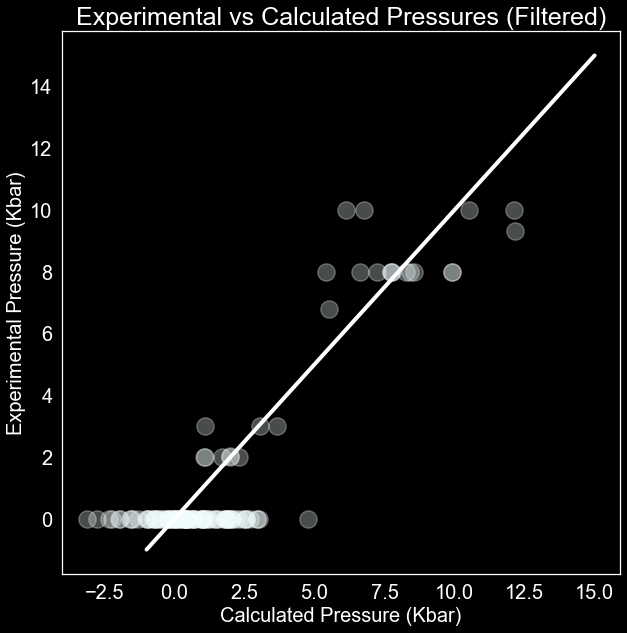

In [47]:
#plot results before probability filter
'Known experimental pressure versus Predicted pressure'
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("dark")
plt.style.use("dark_background")
ax = sns.scatterplot(x="Pressure_min", y="Pressure_kbar", data=df_up, s=300, color = "azure", alpha = 0.3)
#ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.axes.set_title("Experimental vs Calculated Pressures (Filtered)",fontsize=25)
ax.set_xlabel("Calculated Pressure (Kbar)",fontsize=20)
ax.set_ylabel("Experimental Pressure (Kbar)",fontsize=20)
ax.tick_params(labelsize=20)

#creating 1:1 line
x = np.linspace(-1,15,100)
y = 1*x+0
plt.plot(x, y, '-w', linewidth=4.0)
plt.show()

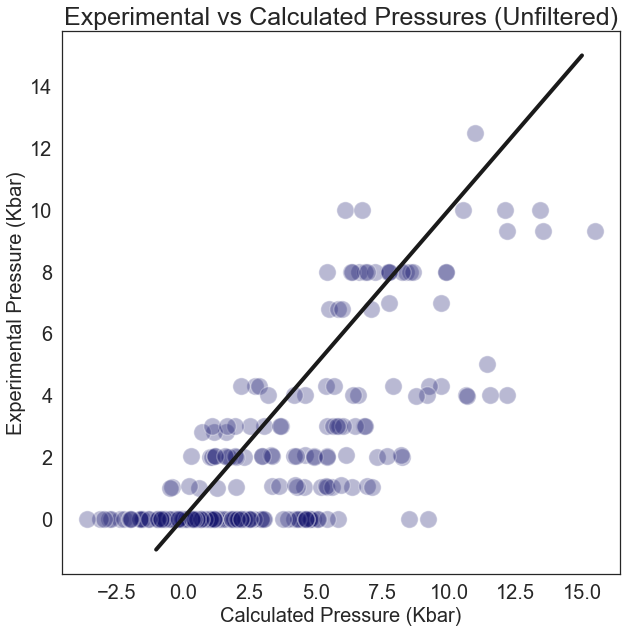

In [48]:
'Known experimental pressure versus Predicted pressure'
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax = sns.scatterplot(x="Pressure_min", y="Pressure_kbar", data=df_Un, s=300, color = "midnightblue", alpha = 0.3)
#ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.axes.set_title("Experimental vs Calculated Pressures (Unfiltered)",fontsize=25)
ax.set_xlabel("Calculated Pressure (Kbar)",fontsize=20)
ax.set_ylabel("Experimental Pressure (Kbar)",fontsize=20)
ax.tick_params(labelsize=20)

#creating 1:1 line
x = np.linspace(-1,15,100)
y = 1*x+0
plt.plot(x, y, '-k', linewidth=4.0)

plt.savefig('Experimental vs Calculated Pressures (Unfiltered).png',dpi=500)

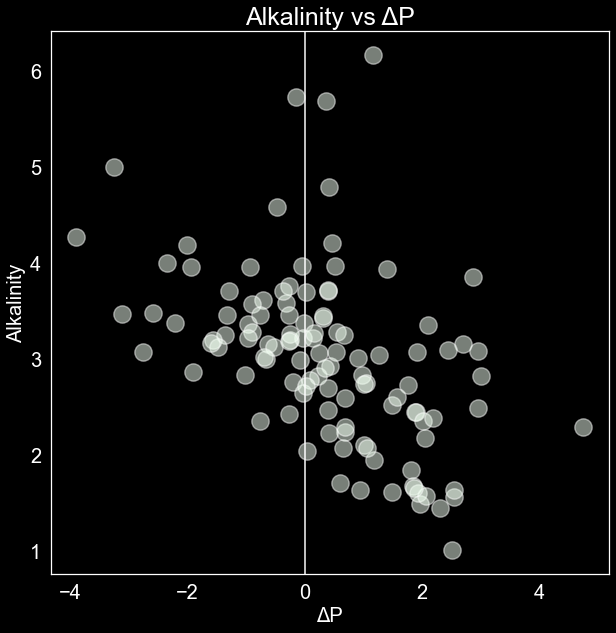

In [49]:
sns.set_style("dark")
plt.style.use("dark_background")
#sns.set(rc={'figure.figsize':(10.0,10)})
ax = sns.scatterplot(x="delta_P", y="alk", data=df_up, s=300, color = 'honeydew', alpha = 0.5)
plt.axvline(0)

ax.axes.set_title("Alkalinity vs ΔP",fontsize=25)
ax.set_xlabel("ΔP",fontsize=20)
ax.set_ylabel("Alkalinity",fontsize=20)
ax.tick_params(labelsize=20)

In [60]:
fig = px.scatter(
    df_up, 
    x="delta_P", 
    y="Probability",  
    template= "plotly_dark", 
    labels={"delta_P": "ΔP",  "Pressure_kbar": "Experimental Pressure"}, 
    marginal_x="histogram", 
    marginal_y="histogram", 
    color='alk',
    hover_data=['Reference', 'Phases', 'Apparatus'],
    color_continuous_scale=px.colors.sequential.Bluyl, 
    title="ΔP vs Probability influenced by Alkalinity?")
fig.show()

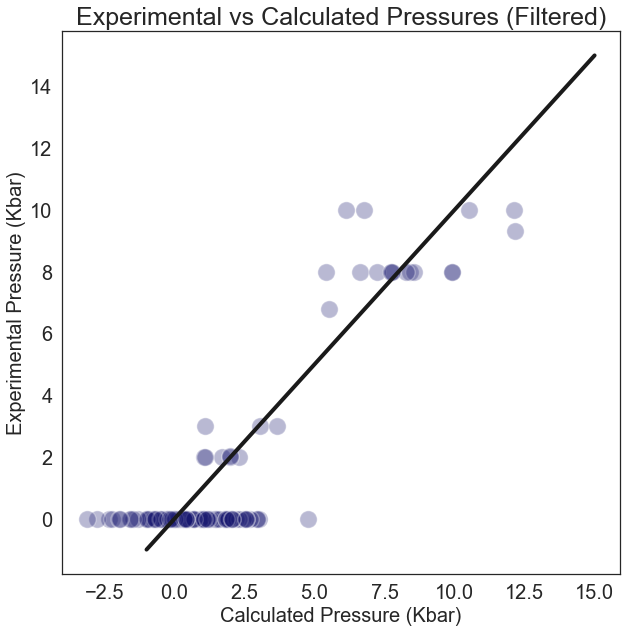

In [51]:
'Known experimental pressure versus Predicted pressure'
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("white")
ax = sns.scatterplot(x="Pressure_min", y="Pressure_kbar", data=df_up, s=300, color = "midnightblue", alpha = 0.3)
#ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

ax.axes.set_title("Experimental vs Calculated Pressures (Filtered)",fontsize=25)
ax.set_xlabel("Calculated Pressure (Kbar)",fontsize=20)
ax.set_ylabel("Experimental Pressure (Kbar)",fontsize=20)
ax.tick_params(labelsize=20)

#creating 1:1 line
x = np.linspace(-1,15,100)
y = 1*x+0
plt.plot(x, y, '-k', linewidth=4.0)

plt.savefig('Experimental vs Calculated Pressures (Filtered).png',dpi=500)

In [52]:
#turn dataframe back to csv file
#df_up.to_csv('Filtered_OPAM_CHi_minimisation.csv')

#For Excel
'''writer = pd.ExcelWriter('myDataFrame.xlsx')
df.to_excel(writer, 'DataFrame')
writer.save()'''

"writer = pd.ExcelWriter('myDataFrame.xlsx')\ndf.to_excel(writer, 'DataFrame')\nwriter.save()"